# Evaluation Critetia in survival analysis
+ C-index
+ Brier Score
+ AUC
+ KM curve & log-rank test

## Concordance Index (C-index)
For a binary outcome, C-index is identical to the area under the ROC curve (AUC).
The concordance index or C-index is a generalization of the area under the ROC curve (AUC) that can take into account censored data. It represents the global assessment of the model discrimination power.

$$
\mathrm{C} \text {-index }=\frac{\sum_{i, j} 1_{T_j<T_i} \cdot 1_{\eta_j>\eta_i} \cdot \delta_j}{\sum_{i, j} 1_{T_j<T_i} \cdot \delta_j}
$$
with:
- $\eta_i$, the risk score of a unit $i$
- $1_{T_j<T_i}=1$ if $T_j<T_i$ else 0
- $1_{\eta_j>\eta_i}=1$ if $\eta_j>\eta_i$ else 0

Similarly to the AUC, C-index $=1$ corresponds to the best model prediction, and C-index $=0.5$ represents a random prediction.

C-index的计算方法是：把所研究的资料中的所有研究对象随机地两两组成对子。以生存分析为例，对于一对病人,如果生存时间较长的一位，其预测生存风险小于生存时间较短的一位，则称之为预测结果与实际结果一致。

病例配对方法：若有n个观察个体,则所有的对子数应为Cn2(组合数)

排除下面两种对子：对子中具有较小观察时间的个体没有达到观察终点及对子中两个个体都没达到观察终点；剩余的为有用对子。
$$
c=\frac{\# \text { concordant pairs }}{\# \text { concordant pairs }+\# \text { discordant pairs }} .
$$

![](censorship.png)

risk:
+ 001 - 0.8
+ 002 - 0.6
+ 003 - 0.5
+ 004 - 0.5
+ 005 - 0.4

pair:
+ unpaired: 001-002
+ pair1: 001-003(concordant)
+ pair2: 001-004(concordant)
+ pair3: 001-005(concordant)
+ unpaired: 002-003
+ unpaired: 002-004

...
+ pair4: 003-005(discordant)
+ pair5: 004-005(discordant)

$$
c=\frac{3}{5} .
$$

## Brier Score
Brier score是个体在t时间的生存状态减去t时间的预测生存概率的差的平方的均值。
#### BS without censor
$$
\begin{aligned}
\operatorname{BS}(t) & =\frac{1}{n} \sum_{i=1}^n\left[\mathbb{1}\left\{T_i^*>t\right\}-\pi_i(t)\right]^2 \\
& =\frac{1}{n} \sum_{i=1}^n\left[\pi_i(t)^2 \mathbb{1}\left\{T_i^* \leq t\right\}+\left[1-\pi_i(t)\right]^2 \mathbb{1}\left\{T_i^*>t\right\}\right]
\end{aligned}
$$
#### BS with censor
用IPCW(逆概率删失加权法)把censor的个体的权重转移到uncensor的个体去计算
$$
\hat{G}(t)=\prod_{j: V_j<t} \frac{n_j-d_j^*}{n_j}
$$
$n_j$: 所有在$t$时有censor可能性的病人，即在$t$时仍存活的病人

$d_j^*$: 在$t$时censor的病人

| Time | #patients | #deaths | #censored | $\hat G(t)$ | weight: $\frac{1}{\hat G(t)}$ |
| :----:|:----:|:----:|:----:|:----:|:----:|
| 0 | 5 |   |   | 1 |   |
| 1 | 5 | 1 | 0 |   | 1 |
| 2 | 4 | 0 | 1 | $\frac{4-1}{4} = \frac{3}{4}$  | 0  |
| 3 | 3 | 1 | 0 |   | $\frac{4}{3}$ |
| 4 | 2 | 0 | 1 | $\frac{3}{4} \times \frac{2-1}{2} = \frac{3}{8}$  | 0 |
| 5 | 1 | 1 | 0 |   | $\frac{8}{3}$ |

ps：IPCW的使用是有限制的！删失必须独立于特征！

加权后的BS:
$$
\begin{aligned}
& B S(t)=\frac{1}{N} \sum_{i=1}^N\left(\frac{\left(0-\hat{S}\left(t, \vec{x}_i\right)\right)^2 \cdot 1_{T_i \leq t, \delta_i=1}}{\hat{G}\left(T_i^{-}\right)}+\frac{\left(1-\hat{S}\left(t, \vec{x}_i\right)\right)^2 \cdot 1_{T_i>t}}{\hat{G}(t)}\right) \\
& B S(t)=\frac{1}{N} \sum_{i=1}^N\left\{\begin{array}{lr}
\frac{0-\hat{S}\left(t \mid Z_i\right)^2}{\hat{G}\left(t_i\right)} & \text { if } t_i \leq t, \delta_i=1 \\
\frac{\left(1-\hat{S}\left(t \mid Z_i\right)\right)^2}{\hat{G}(t} & \text { if } t_i>t \\
0 & \text { if } t_i=t, \delta_i=0
\end{array}\right. \\
&
\end{aligned}
$$

取两个时间点计算具体值：
$$
BS(3) = \frac{1}{5} \times ( \frac{S_1^2}{1} + S_3^2 \times \frac{4}{3} + (1-S_4)^2 \times \frac{4}{3} + (1-S_5)^2 \times \frac{4}{3} ) \\
BS(5) = \frac{1}{5} \times ( \frac{S_1^2}{1} + S_3^2 \times \frac{4}{3} + S_5^2 \times \frac{8}{3} )
$$
ps: 对于t前删失的样本不进行计算

we found that BS depends on the selection of time point t. Generally, the median of the observation time is selected as the time point.

### Integrated Brier Score
The Integrated Brier Score (IBS) provides an overall calculation of the model performance at all available times $t_1 \leq t \leq t_{\text {max }}$.
The integrated time-dependent Brier score over the interval $\left[t_1 ; t_{\max }\right]$ is defined as
$$
\mathrm{IBS}=\int_{t_1}^{t_{\max }} \mathrm{BS}(t) d w(t)
$$
where the weighting function is $w(t)=t / t_{\max }$. The integral is estimated via the trapezoidal rule.

## Cumulative/Dynamic AUC
The receiver operating characteristic (ROC) curve and the area under the ROC curve (AUC) can be extended to survival data by defining sensitivity (true positive rate) and specificity (true negative rate) as time-dependent measures. Cumulative cases are all individuals that experienced an event prior to or at time $t\left(t_i \leq t\right)$, whereas dynamic controls are those with $t_i>t$. The associated cumulative/dynamic AUC quantifies how well a model can distinguish subjects who fail by a given time $\left(t_i \leq t\right)$ from subjects who fail after this time $\left(t_i>t\right)$.
Given an estimator of the $i$-th individual's risk score $\hat{f}\left(\mathbf{x}_i\right)$, the cumulative/dynamic AUC at time $t$ is defined as
$$
\widehat{\mathrm{AUC}}(t)=\frac{\sum_{i=1}^n \sum_{j=1}^n I\left(y_j>t\right) I\left(y_i \leq t\right) \omega_i I\left(\hat{f}\left(\mathbf{x}_j\right) \leq \hat{f}\left(\mathbf{x}_i\right)\right)}{\left(\sum_{i=1}^n I\left(y_i>t\right)\right)\left(\sum_{i=1}^n I\left(y_i \leq t\right) \omega_i\right)}
$$
where $\omega_i$ are inverse probability of censoring weights (IPCW).
To estimate IPCW, access to survival times from the training data is required to estimate the censoring distribution. Note that this requires that survival times survival_test lie within the range of survival times survival_train. This can be achieved by specifying times accordingly, e.g. by setting times [-1] slightly below the maximum expected follow-up time. IPCW are computed using the Kaplan-Meier estimator, which is restricted to situations where the random censoring assumption holds and censoring is independent of the features.

Finally, the function also provides a single summary measure that refers to the mean of the $\mathrm{AUC}(t)$ over the time range $\left(\tau_1, \tau_2\right)$.
$$
\overline{\operatorname{AUC}}\left(\tau_1, \tau_2\right)=\frac{1}{\hat{S}\left(\tau_1\right)-\hat{S}\left(\tau_2\right)} \int_{\tau_1}^{\tau_2} \widehat{\operatorname{AUC}}(t) d \hat{S}(t)
$$
where $\hat{S}(t)$ is the Kaplan-Meier estimator of the survival function.

ps: 注意这里的$\hat{S}(t)$和上面计算BS时不一样，计算BS时的$\hat{S}(t)$是预测的生存概率，这里是根据KM法计算的真实的生存概率

## Kaplan-Meier Curve and log-rank test
#### KM estimator：
$$
S_{t+1}=S_t \times\left(\frac{N_{t+1}-D_{t+1}}{N_{t+1}}\right)
$$

$S_t$: t时刻的累计生存概率

$N_t$: t时刻的仍存活的病例数

$D_t$: t时刻的死亡病例数

| Time | #patients | #deaths | #censored | $S_t$ |
| :----:|:----:|:----:|:----:|:----:|
| 0 | 5 |   |   | $1$ |
| 1 | 5 | 1 | 0 | $1 \times (5-1)/5 = 0.8$|
| 2 | 4 | 0 | 1 | $0.8 \times (4-0)/4 = 0.8$|
| 3 | 3 | 1 | 0 | $0.8 \times (3-1)/3 = 0.53$|
| 4 | 2 | 0 | 1 | $0.53 \times (2-0)/2 = 0.53$|
#### KM curve
![](KM_curve.png)

#### Log-rank test
在每个时间点$t_i$有列联表如下（可以是治疗组和对照组/高风险组和低风险组，是两条生存曲线的比较，0假设是两条生存曲线无差异）：

| | 组A | 组B | 合计 |
| :----: | :----: | :----: | :----: |
| 死亡数 | $d_i(A)$ | $d_i(B)$ | $d_i$ |
| 存活数 | $n_i(A)-d_i(A)$ | $n_i(B)-d_i(B)$ | $n_i-d_i$ |
| 合计 | $n_i(A)$ | $n_i(B)$ | $n_i$ |

如果两组的受试者人群与总人群的生存状态是相互独立的，那么在治疗组下死亡的人数 $D_i(A)$ 满足超几何分布，其概率分布函数，期望和方差为

$P\left(D_i(A)=d_i(A)\right)=\frac{\left(\begin{array}{l}d_i \\ d_i(A)\end{array}\right)\left(\begin{array}{l}n_i-d_i \\ n_i(A)-d_i(A)\end{array}\right)}{\left(\begin{array}{l}n_i \\ d_i\end{array}\right)}$

$E\left(D_i(A)\right)=\mu_i=\frac{d_i n_i(A)}{n_i}$

$D\left(D_i(A)\right)=\sigma_i^2=n_{T i}\left(\frac{d_i}{n_i}\right)\left(\frac{n_i-d_i}{n_i}\right)\left(\frac{n_i-n_i(A)}{n_i-1}\right)$

根据李雅普诺夫中心极限定理可得，以下统计量服从标准正态分布，此统计量也称为Log-rank统计量：
$$
\frac{\sum_{i=1}^k D_i(A)-\sum_{i=1}^k \mu_k}{\sqrt{\sum_{i=1}^k \sigma_i^2}} \sim N(0,1)
$$

---------------------------

# Python package for survival analysis
+ scikit-survival https://github.com/sebp/scikit-survival
+ pysurvival https://github.com/square/pysurvival
+ pycox https://github.com/havakv/pycox

## pycox-discrete

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper 

import torch # For building the networks 
import torchtuples as tt # Some useful functions

from pycox.datasets import metabric
from pycox.models import MTLR
from pycox.evaluation import EvalSurv

In [20]:
# train-val-test split
df_train = metabric.read_df()
df_test = df_train.sample(frac=0.2)
df_train = df_train.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

In [21]:
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,duration,event
0,5.603834,7.811392,10.797988,5.967607,1.0,1.0,0.0,1.0,56.840000,99.333336,0
2,5.920251,6.776564,12.431715,5.873857,0.0,1.0,0.0,1.0,48.439999,140.233337,0
4,5.456747,5.339741,10.555724,6.008429,1.0,0.0,0.0,1.0,67.849998,56.933334,1
5,5.425826,6.331182,10.455145,5.749053,1.0,1.0,0.0,1.0,70.519997,123.533333,0
6,5.624060,5.679635,9.819317,5.613775,1.0,1.0,0.0,1.0,49.919998,261.200012,0


In [22]:
# feature transforms
cols_standardize = ['x0', 'x1', 'x2', 'x3', 'x8']
cols_leave = ['x4', 'x5', 'x6', 'x7']

standardize = [([col], StandardScaler()) for col in cols_standardize]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)

x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

In [23]:
# label transforms
num_durations = 10
labtrans = MTLR.label_transform(num_durations)
get_target = lambda df: (df['duration'].values, df['event'].values)
y_train = labtrans.fit_transform(*get_target(df_train))
y_val = labtrans.transform(*get_target(df_val))

train = (x_train, y_train)
val = (x_val, y_val)

# We don't need to transform the test labels
durations_test, events_test = get_target(df_test)

In [24]:
y_train[0].max()

9

In [25]:
# model: MLP
in_features = x_train.shape[1]
out_features = labtrans.out_features

net = torch.nn.Sequential(
    torch.nn.Linear(in_features, 32),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(32),
    torch.nn.Dropout(0.1),
    
    torch.nn.Linear(32, 32),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(32),
    torch.nn.Dropout(0.1),
    
    torch.nn.Linear(32, out_features)
)

In [26]:
# training
model = MTLR(net, tt.optim.Adam, duration_index=labtrans.cuts)

In [27]:
batch_size = 256
model.optimizer.set_lr(0.01)
epochs = 100
callbacks = [tt.callbacks.EarlyStopping()]
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, val_data=val)

0:	[0s / 0s],		train_loss: 1.7103,	val_loss: 1.5240
1:	[0s / 0s],		train_loss: 1.5672,	val_loss: 1.4913
2:	[0s / 0s],		train_loss: 1.4817,	val_loss: 1.4536
3:	[0s / 0s],		train_loss: 1.4487,	val_loss: 1.4287
4:	[0s / 0s],		train_loss: 1.4153,	val_loss: 1.4154
5:	[0s / 0s],		train_loss: 1.4060,	val_loss: 1.4090
6:	[0s / 0s],		train_loss: 1.3686,	val_loss: 1.4069
7:	[0s / 0s],		train_loss: 1.3632,	val_loss: 1.4074
8:	[0s / 0s],		train_loss: 1.3514,	val_loss: 1.4160
9:	[0s / 0s],		train_loss: 1.3402,	val_loss: 1.4232
10:	[0s / 0s],		train_loss: 1.3241,	val_loss: 1.4284
11:	[0s / 0s],		train_loss: 1.3159,	val_loss: 1.4309
12:	[0s / 0s],		train_loss: 1.3158,	val_loss: 1.4364
13:	[0s / 0s],		train_loss: 1.3012,	val_loss: 1.4321
14:	[0s / 0s],		train_loss: 1.2756,	val_loss: 1.4426
15:	[0s / 0s],		train_loss: 1.3025,	val_loss: 1.4520
16:	[0s / 0s],		train_loss: 1.2847,	val_loss: 1.4618


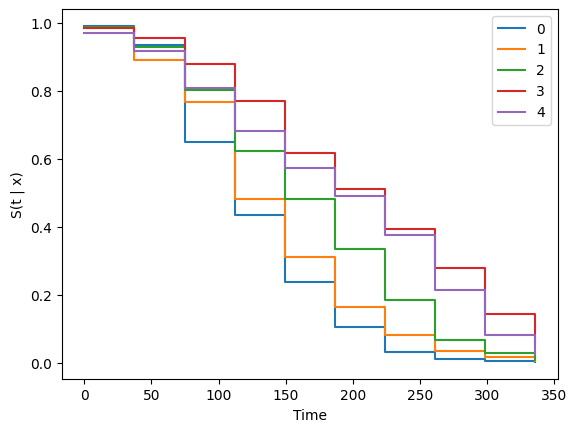

In [28]:
# prediction
surv = model.predict_surv_df(x_test)
surv.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

In [29]:
# evaluation
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

In [30]:
# c-index
ev.concordance_td()

0.6072688505524326

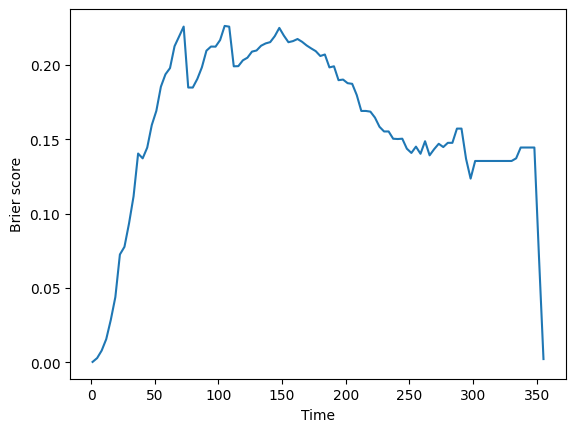

In [31]:
# brier score
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev.brier_score(time_grid).plot()
plt.ylabel('Brier score')
_ = plt.xlabel('Time')

In [32]:
ev.integrated_brier_score(time_grid) 

0.16207561093824618

In [33]:
# label transforms
num_durations = 100
labtrans = MTLR.label_transform(num_durations)
get_target = lambda df: (df['duration'].values, df['event'].values)
y_train = labtrans.fit_transform(*get_target(df_train))
y_val = labtrans.transform(*get_target(df_val))

train = (x_train, y_train)
val = (x_val, y_val)

# We don't need to transform the test labels
durations_test, events_test = get_target(df_test)
# model: MLP
in_features = x_train.shape[1]
out_features = labtrans.out_features

net = torch.nn.Sequential(
    torch.nn.Linear(in_features, 32),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(32),
    torch.nn.Dropout(0.1),
    
    torch.nn.Linear(32, 32),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(32),
    torch.nn.Dropout(0.1),
    
    torch.nn.Linear(32, out_features)
)
# training
model = MTLR(net, tt.optim.Adam, duration_index=labtrans.cuts)
batch_size = 256
model.optimizer.set_lr(0.01)
epochs = 100
callbacks = [tt.callbacks.EarlyStopping()]
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, val_data=val)

0:	[0s / 0s],		train_loss: 3.9042,	val_loss: 2.9048
1:	[0s / 0s],		train_loss: 3.2788,	val_loss: 2.8527
2:	[0s / 0s],		train_loss: 3.0906,	val_loss: 2.7859
3:	[0s / 0s],		train_loss: 2.9588,	val_loss: 2.7799
4:	[0s / 0s],		train_loss: 2.8923,	val_loss: 2.7665
5:	[0s / 0s],		train_loss: 2.8493,	val_loss: 2.7926
6:	[0s / 0s],		train_loss: 2.8583,	val_loss: 2.8037
7:	[0s / 0s],		train_loss: 2.8089,	val_loss: 2.8369
8:	[0s / 0s],		train_loss: 2.8246,	val_loss: 2.8346
9:	[0s / 0s],		train_loss: 2.7806,	val_loss: 2.8132
10:	[0s / 0s],		train_loss: 2.7522,	val_loss: 2.8317
11:	[0s / 0s],		train_loss: 2.7446,	val_loss: 2.8151
12:	[0s / 0s],		train_loss: 2.7311,	val_loss: 2.8541
13:	[0s / 0s],		train_loss: 2.7522,	val_loss: 2.8385
14:	[0s / 0s],		train_loss: 2.7220,	val_loss: 2.8316


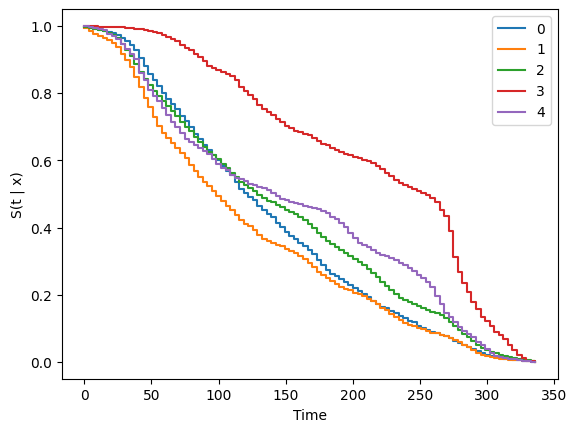

In [34]:
# prediction
surv = model.predict_surv_df(x_test)
surv.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

In [35]:
# evaluation
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

In [36]:
# c-index
ev.concordance_td()

0.6262647799961233

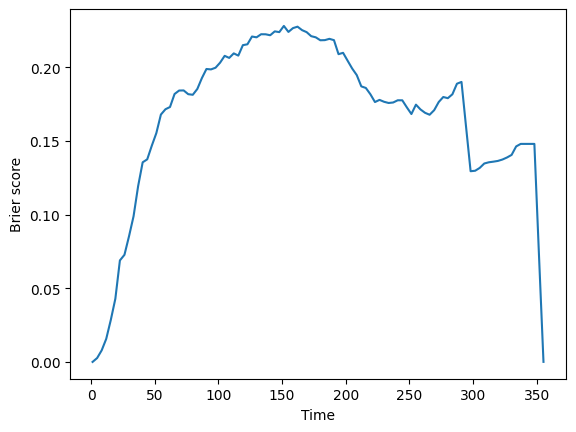

In [37]:
# brier score
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev.brier_score(time_grid).plot()
plt.ylabel('Brier score')
_ = plt.xlabel('Time')

In [38]:
ev.integrated_brier_score(time_grid)

0.16826478912269371

## pycox-continuous

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

import torch
import torchtuples as tt

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

df_train = metabric.read_df()
df_test = df_train.sample(frac=0.2)
df_train = df_train.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

cols_standardize = ['x0', 'x1', 'x2', 'x3', 'x8']
cols_leave = ['x4', 'x5', 'x6', 'x7']

standardize = [([col], StandardScaler()) for col in cols_standardize]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)

x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

get_target = lambda df: (df['duration'].values, df['event'].values)
y_train = get_target(df_train)
y_val = get_target(df_val)
durations_test, events_test = get_target(df_test)
val = x_val, y_val

In [57]:
# model: MLP
in_features = x_train.shape[1]
out_features = 1

net = torch.nn.Sequential(
    torch.nn.Linear(in_features, 32),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(32),
    torch.nn.Dropout(0.1),
    
    torch.nn.Linear(32, 32),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(32),
    torch.nn.Dropout(0.1),
    
    torch.nn.Linear(32, out_features)
)

In [58]:
# training
model = CoxPH(net, tt.optim.Adam)
batch_size = 256
model.optimizer.set_lr(0.01)
epochs = 512
callbacks = [tt.callbacks.EarlyStopping()]
verbose = True
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

0:	[0s / 0s],		train_loss: 4.7652,	val_loss: 4.0341
1:	[0s / 0s],		train_loss: 4.6706,	val_loss: 4.0089
2:	[0s / 0s],		train_loss: 4.6476,	val_loss: 3.9682
3:	[0s / 0s],		train_loss: 4.6006,	val_loss: 3.9494
4:	[0s / 0s],		train_loss: 4.6070,	val_loss: 3.9444
5:	[0s / 0s],		train_loss: 4.5849,	val_loss: 3.9217
6:	[0s / 0s],		train_loss: 4.5741,	val_loss: 3.9133
7:	[0s / 0s],		train_loss: 4.5618,	val_loss: 3.9342
8:	[0s / 0s],		train_loss: 4.5365,	val_loss: 3.9154
9:	[0s / 0s],		train_loss: 4.5407,	val_loss: 3.9266
10:	[0s / 0s],		train_loss: 4.5315,	val_loss: 3.9926
11:	[0s / 0s],		train_loss: 4.5211,	val_loss: 3.9868
12:	[0s / 0s],		train_loss: 4.5368,	val_loss: 3.9959
13:	[0s / 0s],		train_loss: 4.4941,	val_loss: 4.0699
14:	[0s / 0s],		train_loss: 4.4997,	val_loss: 3.9917
15:	[0s / 0s],		train_loss: 4.5000,	val_loss: 3.9821
16:	[0s / 0s],		train_loss: 4.4971,	val_loss: 4.0597


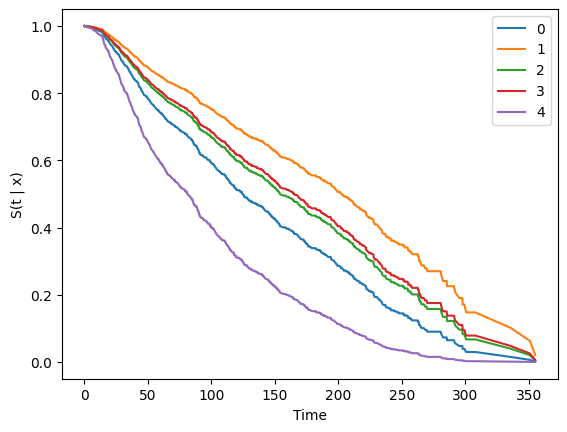

In [59]:
# prediction
_ = model.compute_baseline_hazards()
surv = model.predict_surv_df(x_test)
surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

In [60]:
# evaluation
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')
# c-index
ev.concordance_td()

0.6464772547154858

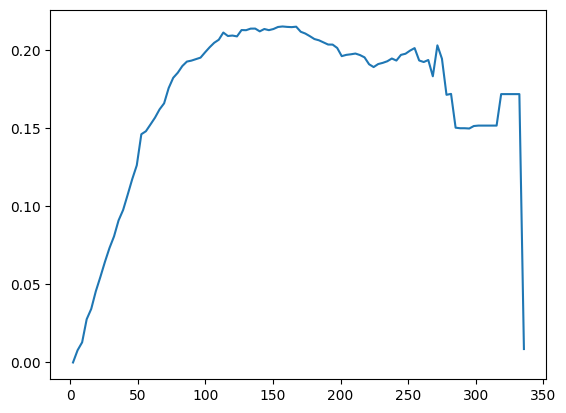

In [61]:
# brier score
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
_ = ev.brier_score(time_grid).plot()

In [45]:
ev.integrated_brier_score(time_grid)

0.18275083777787252

#### Cumulative/Dynamic AUC

In [62]:
from sksurv.metrics import cumulative_dynamic_auc

In [63]:
dtype = np.dtype([('Event Indicator', bool), ('Time', int)])

In [64]:
event = np.array(y_train[1])
time = np.array(y_train[0])
train = np.zeros(len(event), dtype=dtype)
train['Event Indicator'] = event
train['Time'] = time

In [65]:
(time.min(), time.max())

(0.0, 355.2)

In [66]:
y_test = get_target(df_test)
event = np.array(y_test[1])
time = np.array(y_test[0])
test = np.zeros(len(event), dtype=dtype)
test['Event Indicator'] = event
test['Time'] = time

In [67]:
(time.min(), time.max())

(2.0, 335.73334)

In [68]:
risk = -surv.sum().to_numpy()

In [69]:
times = np.arange(time.min()+1, time.max()-1)

In [70]:
(times.min(),times.max())

(3.0, 334.0)

In [71]:
auc, min_auc = cumulative_dynamic_auc(train, test, risk, times)
min_auc

0.6832756507004165